In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import env
import acquire
import prepare

from IPython.display import display, Latex

In [88]:
from platform import python_version
import sys

In [92]:
#python_version()
print(sys.version)

3.9.13 (main, Aug 25 2022, 18:24:45) 
[Clang 12.0.0 ]


---
# Acquire Exercises
---

# 4. In a jupyter notebook, ```classification_exercises.ipynb```, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, ``df_iris``, from this data.

In [16]:
iris = sns.load_dataset('iris')

In [17]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [18]:
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [19]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 5. Read the data from this -google sheet- into a dataframe, ```df_google```.

In [8]:
import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df_google.shape

(891, 12)

In [11]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [14]:
unique_cat = df_google.select_dtypes(exclude=['int', 'float'])

In [15]:
unique_cat.dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [16]:
unique_cat.head(3)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


In [17]:
unique_cat.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
dtype: int64

In [18]:
unique_cat['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
unique_cat.value_counts("Cabin")

Cabin
C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
C22 C26            3
E101               3
F33                3
D                  3
C78                2
B57 B59 B63 B66    2
B58 B60            2
E24                2
E121               2
B77                2
C92                2
C123               2
C124               2
C125               2
C126               2
D36                2
C2                 2
C83                2
E25                2
D35                2
D33                2
D26                2
D20                2
C52                2
D17                2
C65                2
C68                2
B51 B53 B55        2
C93                2
B5                 2
E8                 2
B20                2
B49                2
B22                2
B28                2
E44                2
E67                2
B35                2
B18                2
F G73              2
E33                2
F4                 2
D15                1
D30    

In [20]:
unique_cat['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
unique_cat.value_counts("Sex")

Sex
male      577
female    314
dtype: int64

In [22]:
unique_cat['Sex'].unique()

array(['male', 'female'], dtype=object)

In [23]:
unique_cat.value_counts("Ticket")

Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Length: 681, dtype: int64

In [24]:
unique_cat['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named ```df_excel```.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [25]:
df_excel = pd.read_excel('train.xlsx')

In [26]:
df_excel_sample = df_excel.head(100)

In [27]:
df_excel_sample.shape

(100, 12)

In [28]:
len(df_excel.index)

891

In [29]:
# index subset of ```shape``` output
df_excel.shape[0]

891

In [30]:
df_excel.iloc[: , :5].head()

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [31]:
df_excel.iloc[: , :5].head()

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [32]:
df_excel.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [33]:
df_excel.select_dtypes(include='object').dtypes

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [34]:
df_excel.select_dtypes(exclude='object').dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [35]:
df_excel.select_dtypes(exclude='object').head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833


In [36]:
df_excel.select_dtypes(exclude='object').describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
only_numerical = df_excel.select_dtypes(exclude='object')

In [38]:
col_ranges = only_numerical.max() - only_numerical.min()

In [4]:
from IPython.display import display, Latex

In [5]:
display(Latex(f'Failed to reject $H_0$'))

<IPython.core.display.Latex object>

In [39]:
col_ranges

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [40]:
(only_numerical.max() - only_numerical.min()).idxmax()

'PassengerId'

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

---
# Preparation Exercises
---

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

---
### Using the Iris Data:
---

_Class Notes_

Purpose of Preparation
- columns names clean
- account missing values
- appropiate data types
- encode categorical variables
- make it repeatable

# 1. Use the function defined in `acquire.py` to load the iris data.

In [42]:
iris_df = acquire.get_iris_data()

In [43]:
iris_df.head(1)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa


In [44]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [45]:
iris_df.isna().sum()

species_id        0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_name      0
dtype: int64

# 2. Drop the `species_id` and `measurement_id` columns.

In [46]:
to_drop = ['species_id', 'measurement_id']
iris_df.drop(columns=to_drop, inplace=True)

In [47]:
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa


# 3. Rename the `species_name` column to just species.

In [48]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)
# or through re-assignment
#
# iris_df['species_name']=iris_df['species']

In [49]:
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [50]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [51]:
dummy_iris = pd.get_dummies(iris_df.species, drop_first=True)

In [52]:
dummy_iris.head(3)

,versicolor,virginica
0,0,0
1,0,0
2,0,0


In [53]:
iris_df = pd.concat([iris_df, dummy_iris], axis=1)

In [54]:
iris_df[iris_df['versicolor']==1].head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
50,7.0,3.2,4.7,1.4,versicolor,1,0
51,6.4,3.2,4.5,1.5,versicolor,1,0
52,6.9,3.1,4.9,1.5,versicolor,1,0


# 5. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [55]:
def prep_iris(df):
    to_drop = ['species_id', 'measurement_id']
    
    df.drop(columns=to_drop, inplace=True)
    df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_iris = pd.get_dummies(df.species, drop_first=True)
    df = pd.concat([df, dummy_iris], axis=1)
    return df

In [56]:
iris_df = acquire.get_iris_data()

In [57]:
function_output = prep_iris(iris_df)

In [58]:
function_output.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0


---
### Using the Titanic Dataset:
---

# 1. Use the function defined in `acquire.py` to load the Titanic data.

In [59]:
titanic_df = acquire.get_titanic_data()

In [60]:
titanic_df.head(1)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


# 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
# pd.read_csv('file.csv',index_col=0)

In [ ]:
titanic_columns = titanic_df.columns.to_list()
titanic_columns

In [ ]:
titanic_df.head(2)

In [ ]:
titanic_df.drop(columns=['Unnamed: 0','passenger_id','class','deck','embarked'], inplace=True)

In [ ]:
titanic_df.head(2)

# 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# Different Dummy Method

In [ ]:
dummy_titanic = pd.get_dummies(titanic_df[['sex','embark_town']], drop_first=True)
dummy_titanic.head(2)

In [ ]:
titanic_df = pd.concat([titanic_df, dummy_titanic], axis=1)

In [ ]:
titanic_df.head(2)

# 4. Create a function named `prep_titanic` that accepts the raw titanic data, and returns the data with the transformations above applied.


In [76]:
def prep_titanic(df):
    df.drop(columns=['Unnamed: 0','passenger_id','class','deck','embarked'], inplace=True)
    dummy_titanic = pd.get_dummies(df[['sex','embark_town']], drop_first=True)
    df = pd.concat([df, dummy_titanic], axis=1)
    return df

In [77]:
titanic_df = acquire.get_titanic_data()
prep_titanic(titanic_df)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,1,0,0


---
### Using the Telco Dataset:
---

# 1. Use the function defined in `acquire.py` to load the Telco data.


In [ ]:
telco_df = acquire.get_telco_data()

In [ ]:
telco_df.head(1)

In [ ]:
telco_df[['payment_type_id','payment_type']]

In [ ]:
pd.crosstab(telco_df.payment_type_id,telco_df.payment_type)

In [ ]:
telco_df.columns

In [78]:
[i for i in telco_df.columns]

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [ ]:
telco_df.select_dtypes(include='object')

In [ ]:
telco_df.total_charges.value_counts()

In [ ]:
# Add '0' to null values
#
# using
# float(''+'0')

telco_df['total_charges'] = (telco_df.total_charges + '0').astype('float')

# 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.


In [ ]:
telco_df = telco_df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

In [ ]:
telco_df.head(1)

# 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.


In [ ]:
telco_df.total_charges.dtype == 'object'

In [ ]:
# .replace
# .map
# .where()
# [==]

In [ ]:
dummy_df =pd.get_dummies(telco_df[['multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)

In [ ]:
dummy_df.head(1)

In [ ]:
telco_df = pd.concat( [telco_df, dummy_df], axis=1 )

In [ ]:
telco_df.head(1)

# 4. Create a function named `prep_telco` that accepts the raw telco data, and returns the data with the transformations above applied.


In [70]:
def prep_telco(df):
        df = df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
        dummy_df = pd.get_dummies(df[['multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)
        df = pd.concat( [df, dummy_df], axis=1 )
        return df

In [72]:
telco_df = acquire.get_telco_data()
prep_telco(telco_df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,0,0,1,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,1,0,0,0,0,0,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,0,1,0,1,0,0,0,1,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,0,0,1,0,0,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,0,1
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,1,0,0,0,0,0,0,0,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,0,1,0,1,0,0,0,1


---
### Split Your Data:
---

# 1. Write a function to split your data into `train`, `test` and `validate` datasets. Add this function to `prepare.py`.

In [68]:
def split_dataset(df):
    # 20% test, 80% train_validate
    # then of the 80% train_validate: 30% validate, 70% train. 

    train, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train, test_size=.3, random_state=123)

    return train,validate,test

# 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, `train_iris`, `validate_iris` and `test_iris`.

In [73]:
iris_df = acquire.get_iris_data()
train_iris, validate_iris,test_iris = split_dataset(prep_iris(iris_df))

In [74]:
train_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
56,6.3,3.3,4.7,1.6,versicolor,1,0


# 3. Run the function on the Titanic dataset, returning 3 datasets, `train_titanic`, `validate_titanic` and `test_titanic`.


In [80]:
titanic_df = acquire.get_titanic_data()
train_titanic, validate_titanic, test_titanic = split_dataset(prep_titanic(titanic_df))

In [81]:
train_titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
689,1,1,female,15.0,0,1,211.3375,Southampton,0,0,0,1


# 4. Run the function on the Telco dataset, returning 3 datasets, `train_telco`, `validate_telco` and `test_telco`.

In [82]:
telco_df = acquire.get_telco_data()
train_telco, validate_telco,test_telco = split_dataset(prep_telco(telco_df))

In [83]:
train_telco.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
4604,6490-FGZAT,Male,0,No,No,6,Yes,No,No internet service,No internet service,...,1,0,1,0,1,0,1,0,1,0


In [84]:
alpha = .05
p=.02
if p < alpha:
    display(Latex((f"Failed to reject $H_{0}$")))

<IPython.core.display.Latex object>

# Explore Exercises
<img align="left" width="200" height="200" src="eda.png">

> \#1 Goal = Find "Target"

## Part 1

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [2]:
iris_db = acquire.get_iris_data()

In [3]:
iris_db.head(1)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa


In [5]:
iris_db = prepare.prep_iris(iris_db)

In [6]:
iris_db.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0


In [7]:
train_validate, test_iris = train_test_split(iris_db, test_size=.2, random_state=123, stratify=iris_db.species)
train_iris, validate_iris = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.species)

In [249]:
#train_iris, validate_iris,test_iris = split_dataset(prep_iris(iris_db))

In [8]:
train_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0


### 2. Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
- Document takeaways & any actions.

# a. Numerical Variables

#### - Identify the columns athat are numeric
#### - then filter the df by those column names

In [9]:
train_iris_num = train_iris.select_dtypes(exclude='object')

In [10]:
train_iris_num.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'versicolor', 'virginica'],
      dtype='object')

# Thought Process

## 1. Look at Distribution for each Variable
## 2. Look for Outliers

# - histogram, boxplot, & describe

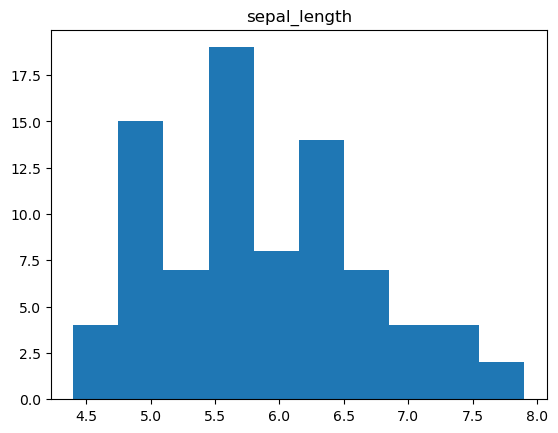

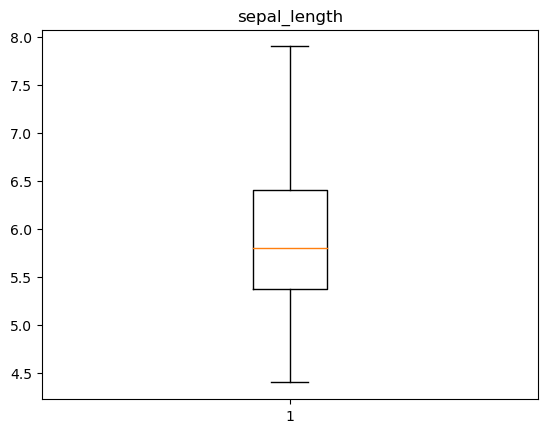

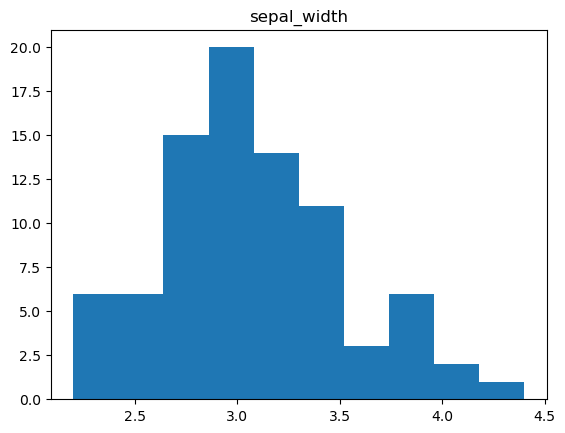

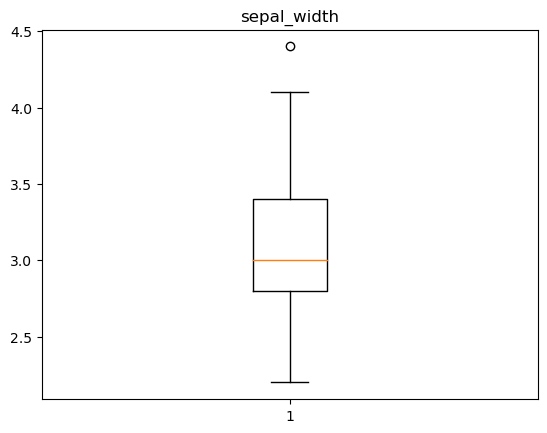

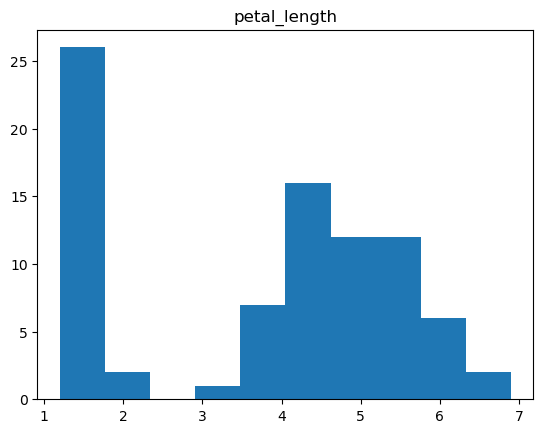

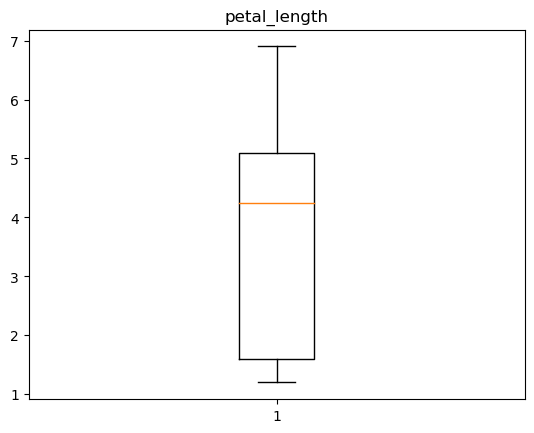

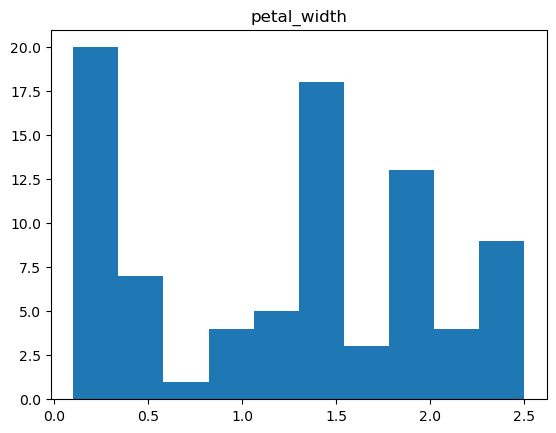

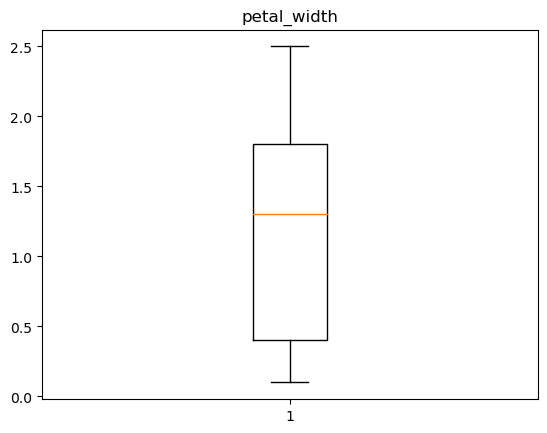

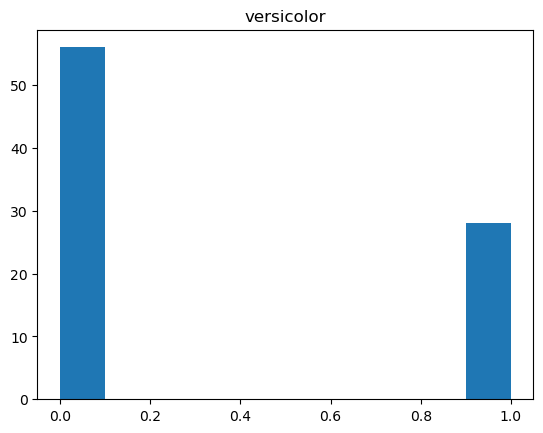

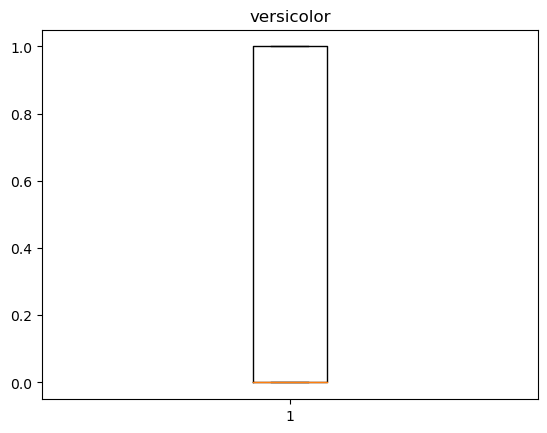

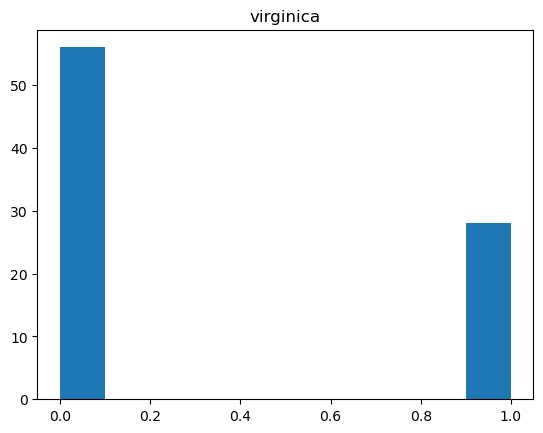

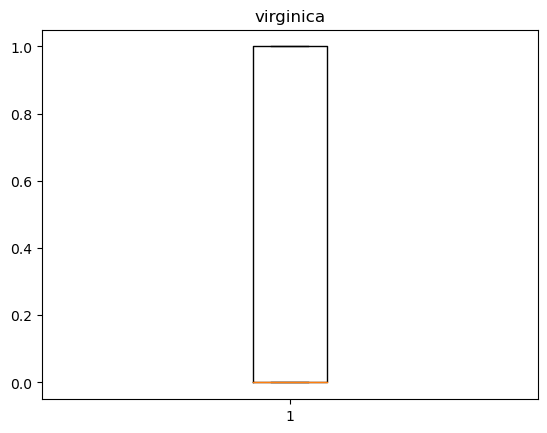

In [13]:
for column in train_iris_num:
    plt.hist(train_iris_num[column])
    plt.title(column)
    plt.show()
    plt.boxplot(train_iris_num[column])
    plt.title(column)
    plt.show()

In [ ]:
# Can I do it as list comprehension?
#
# [for column in train_iris_num]

In [14]:
train_iris_num.head(1)

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,5.7,2.6,3.5,1.0,1,0


In [15]:
train_iris_num.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [ ]:
# histogram, boxplot, & compute

In [256]:
train_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
versicolor        uint8
virginica         uint8
dtype: object

In [257]:
train_iris.dtypes[6]

dtype('uint8')

In [190]:
train_iris['virginica'].dtypes

dtype('uint8')

In [193]:
(train_iris['virginica'].dtype == ('float64'))

False

In [194]:
(train_iris['virginica'].dtype == ('uint8'))

True

In [16]:
# List comprehension that outputs Booleans
#
# 1. Uses ouput of 'df.columns' & loops with df['i']
# 2. Test for == float OR == int
# 3. I can then apply this Boolean List to filter again
#    the output of 'df.columns'

test = [(train_iris[column].dtype == ('float64')) or (train_iris[column].dtype == ('uint8')) for column in train_iris.columns]

In [17]:
# 3. Using boolean list to filter:

numerical_only_df_columns = train_iris.columns[test]
old_df_columns = train_iris.columns

In [18]:
print(f'All columns count: {len(old_df_columns)}')
print(f'Only numerical columns count: {len(numerical_only_df_columns)}')

All columns count: 7
Only numerical columns count: 6


In [ ]:
for i in train_iris.columns:
    #print(i)
    #print(train_iris[i].dtype)
    #print(train_iris[i].dtype==('float64' or "uint8"))

    train_iris[(train_iris[i].dtype == ('uint8')) or (train_iris[i].dtype == ('float64'))]

In [20]:
# Practice:
# Single Test for either type

train_iris['virginica'].dtype == ('uint8') or train_iris['virginica'].dtype == ('float64')

True

In [21]:
# Practice list comprehension:
# Test for 1 type

[train_iris[col].dtype == 'float64' for col in train_iris.columns]

[True, True, True, True, False, False, False]

In [22]:
numerical_columns = train_iris.columns[[train_iris[col].dtype == 'float64' for col in train_iris.columns]]

In [24]:
numerical_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

# Categorical Variables

In [25]:
train_iris_cat = train_iris.select_dtypes(include='object')

In [26]:
train_iris_num.head(2)

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,5.7,2.6,3.5,1.0,1,0
36,5.5,3.5,1.3,0.2,0,0


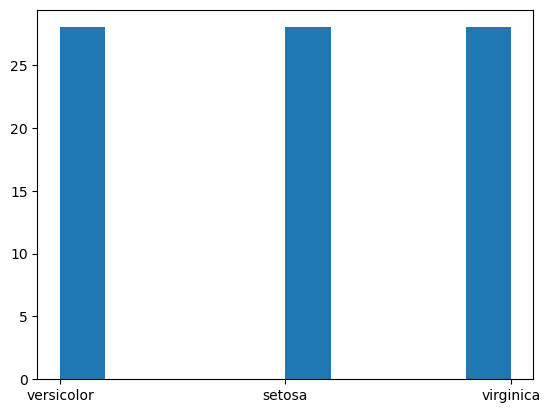

In [27]:
plt.hist(train_iris_cat['species'])
plt.show()

<AxesSubplot:>

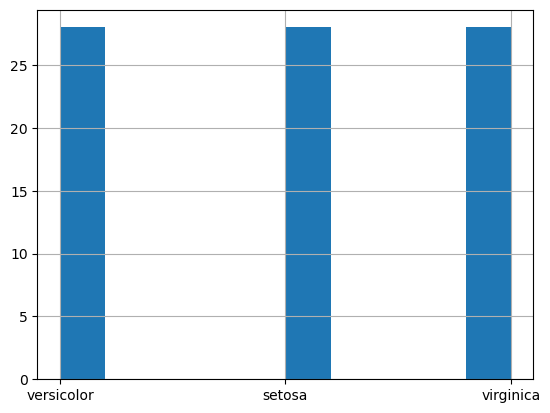

In [28]:
train_iris_cat['species'].hist()

### 3. Bivariate Stats
-  Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.
- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
- Document takeaways & any actions.

In [29]:
len(train_iris)

84

In [263]:
len(train_iris_num)

84

In [262]:
len(train_iris_cat)

84

In [260]:
train_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'versicolor', 'virginica'],
      dtype='object')

In [259]:
train_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.841667,3.028571,3.804762,1.211905,0.369048,0.321429
std,0.813324,0.428101,1.718777,0.732450,0.485445,0.469830
min,4.500000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.375000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.000000,6.700000,2.500000,1.000000,1.000000


In [30]:
train_iris_cat.columns

Index(['species'], dtype='object')

In [31]:
train_iris_num.head(2)

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,5.7,2.6,3.5,1.0,1,0
36,5.5,3.5,1.3,0.2,0,0


In [32]:
train_iris_num.columns
train_iris_num = train_iris_num.drop(["versicolor","virginica"], axis='columns')

In [33]:
train_iris_num.head(2)

,sepal_length,sepal_width,petal_length,petal_width
79,5.7,2.6,3.5,1.0
36,5.5,3.5,1.3,0.2


In [34]:
mean_num_col = train_iris['sepal_length'].mean()

# Pandas

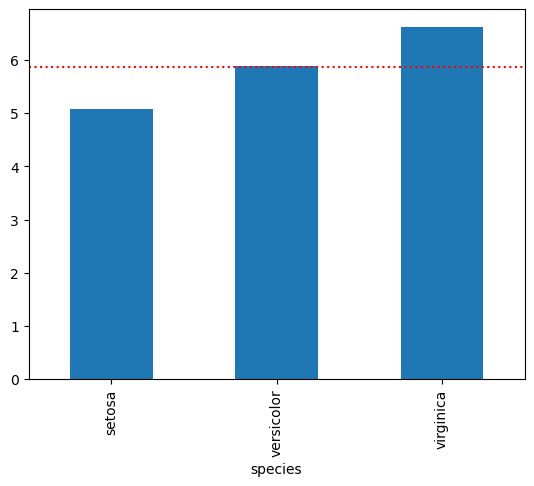

In [35]:
train_iris.groupby(['species'])['sepal_length'].mean().plot.bar()
plt.axhline(mean_num_col, label="sepal_length mean", color='red', linestyle='dotted')


# Matplotlib

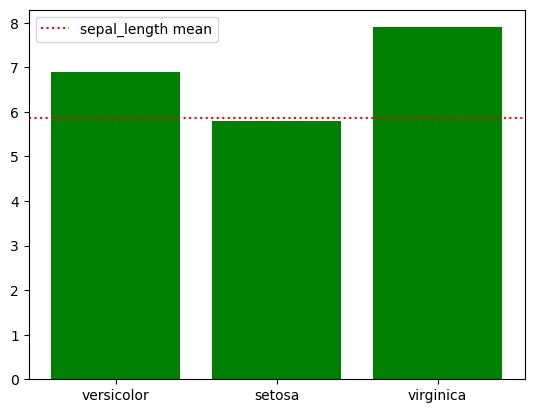

In [429]:
plt.bar('species', 'sepal_length', data=train_iris, color='green')
plt.axhline(mean_num_col, label="sepal_length mean", color='red', linestyle='dotted')
plt.legend()
plt.show()

# Seaborn

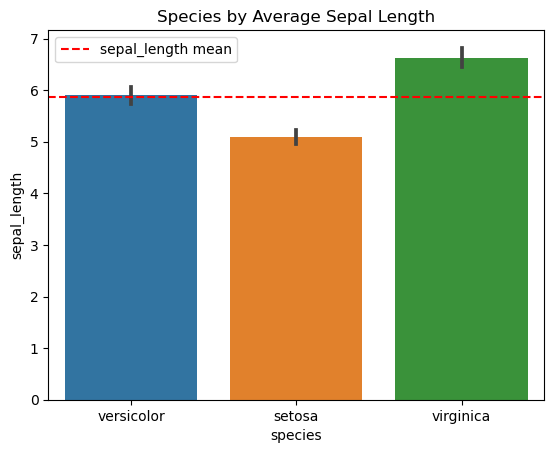

In [433]:
sns.barplot(x="species", y="sepal_length", data=train_iris)
plt.axhline(mean_num_col, label="sepal_length mean", color='red', linestyle='dashed')
plt.title("Species by Average Sepal Length")
plt.legend()
plt.show()


In [ ]:
iris_num_1 = train_iris_num.drop(["versicolor","virginica"], axis='columns')

In [37]:
for column in iris_num_1:
    print(column)

NameError: name 'iris_num_1' is not defined

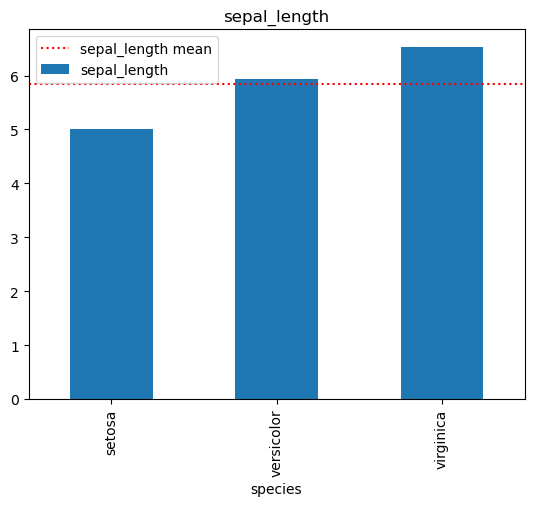

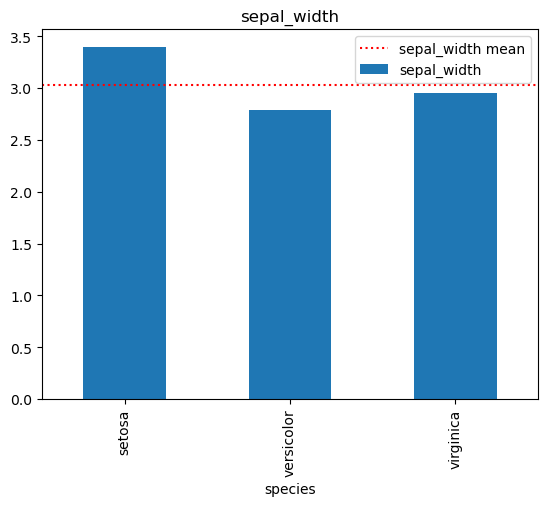

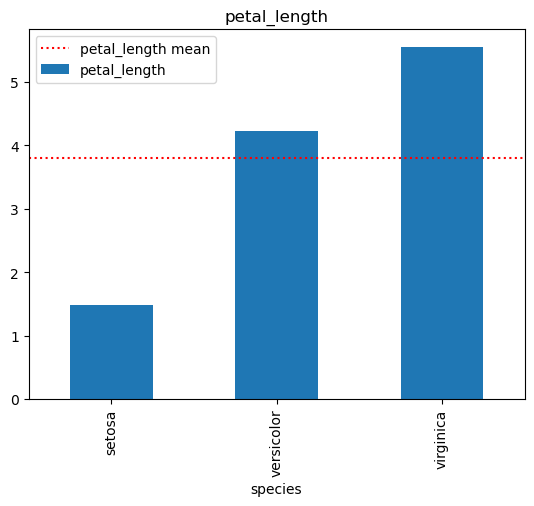

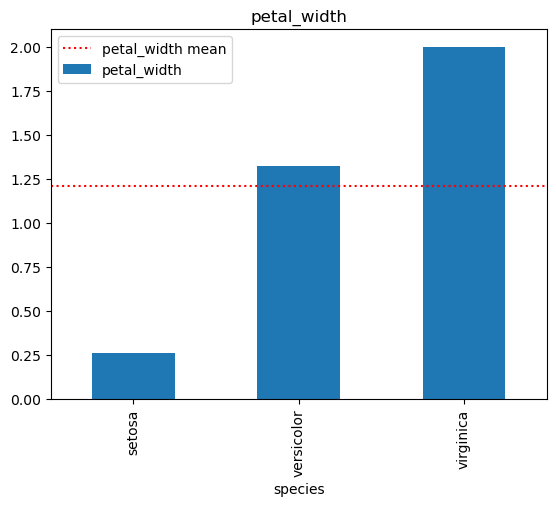

In [315]:
for column in iris_num_1:
    mean_num_col = train_iris[column].mean()
    train_iris.groupby(['species'])[column].mean().plot.bar()
    plt.axhline(mean_num_col, label=f"{column} mean", color='red', linestyle='dotted')
    
    plt.title(column)
    plt.legend()
    plt.show()

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

<div class="alert alert-block alert-success">
<h1> Takeaways </h1>:
<br> Sepal Length :
<br> Petal Length :
<br> Petal Width : 
    <h4> Mann Whitney Test to compare means </h4>
<br> $H_O$: There is no significant difference between 2 groups
        <br> $P < \alpha $
<br> $H_A$: There is a significant difference between 2 groups
</div>

### 4. Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.
- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).
- Document takeaways and any actions.

In [ ]:
# look for new features to create
# like petal and sepal "area" (petal L*W)

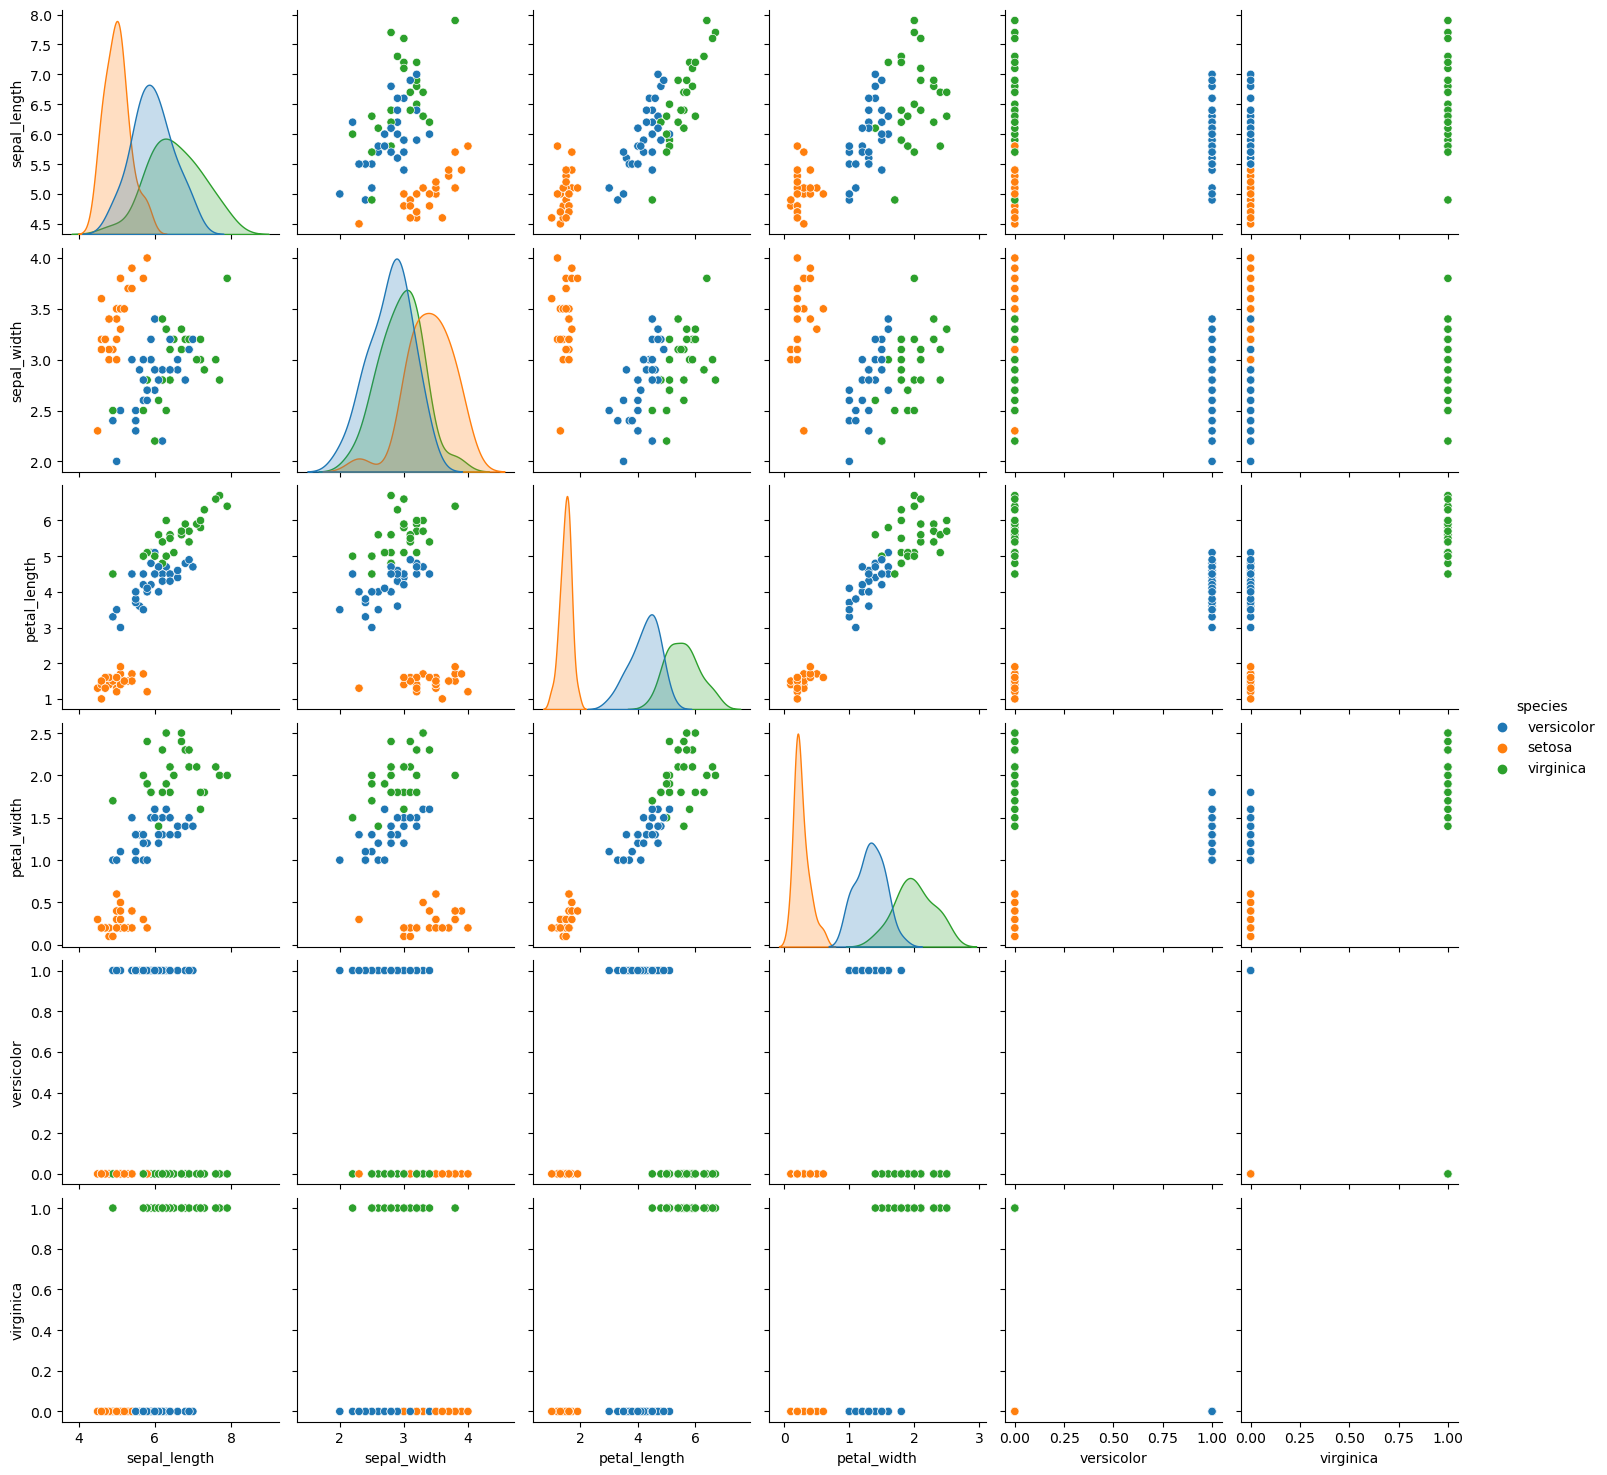

In [317]:
#plt.figure(figsize=)
sns.pairplot(train_iris, hue='species')
plt.show()

<div class="alert alert-block alert-success">
<h1> Bivariate Takeaways: </h1>
<br> - Sepal Length can al  
    o help separate virginaca nan d versicolar a s vifgina is lgihgly shortrter

<br> - Petal Length \& Petal Width can be used to distinguih setosa from the other and can be hepfu for the other 2 setosa hjas the shortest petal lendght and width
    
<h4> Mann Whitney Test to compare means </h4>
<br> $H_O$: There is no significant difference between 2 groups
        <br> $P < \alpha $
<br> $H_A$: There is a significant difference between 2 groups
</div>

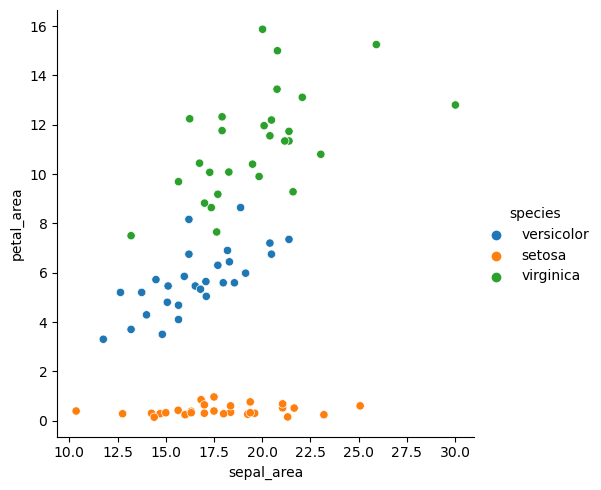

In [44]:
# Trying out creating a new feature
# + Plotting New Feature

train_iris['sepal_area']=train_iris.sepal_length*train_iris.sepal_width
train_iris['petal_area']=train_iris.petal_length*train_iris.petal_width
sns.relplot(x=train_iris['sepal_area'],y=train_iris['petal_area'],data=train_iris,hue='species')
plt.show()

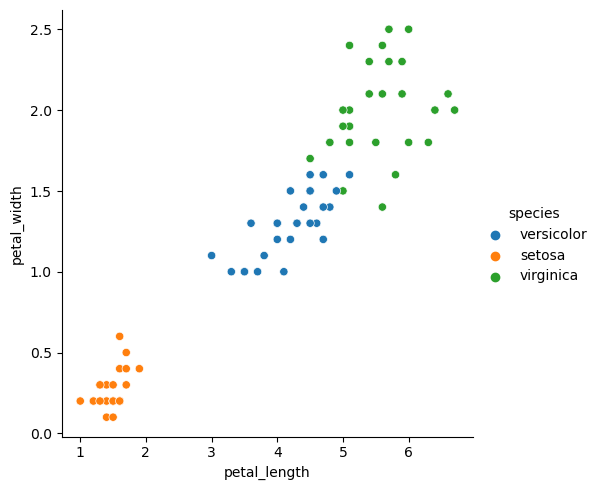

In [323]:
sns.relplot(data=train_iris, x='petal_length', y='petal_width', hue='species')
plt.show()

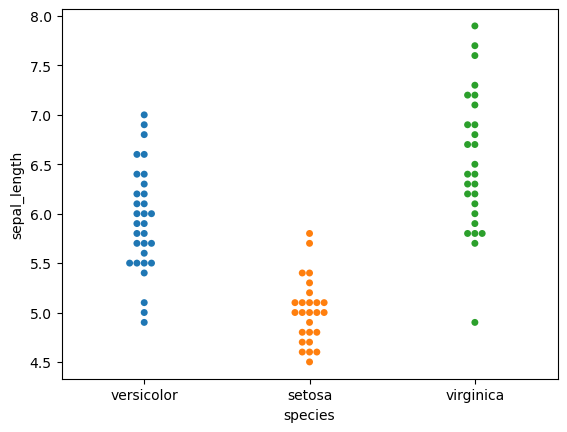

In [324]:
sns.swarmplot(data=train_iris, x='species', y='sepal_length')
plt.show()

In [39]:
iris_trian_melt = train_iris.melt(id_vars = 'species')

In [326]:
iris_trian_melt.head(2)

,species,variable,value
0,versicolor,sepal_length,6.3
1,setosa,sepal_length,5.0


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


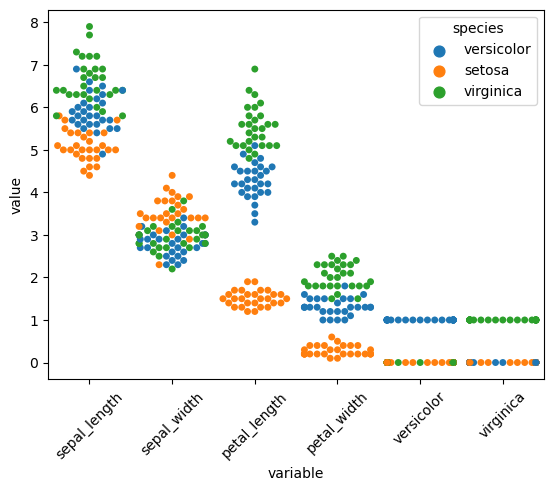

In [41]:
sns.swarmplot(data=iris_trian_melt, x='variable', y='value', hue='species')
plt.xticks(rotation=45)
plt.show()

#### Share With Class

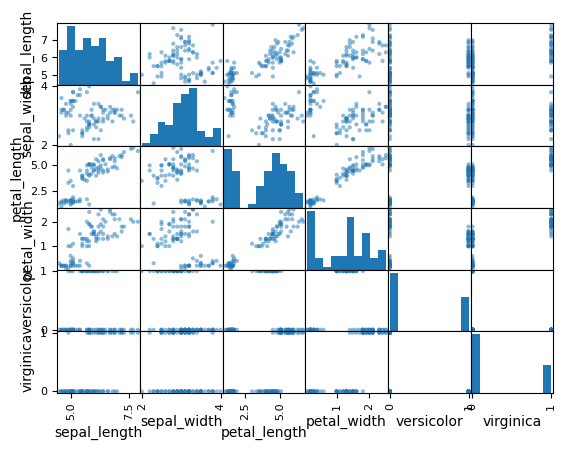

In [415]:
pd.plotting.scatter_matrix(train_iris)
plt.show()


## Part II

### 1. Explore your titanic dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

In [47]:
titanic_df = acquire.get_titanic_data()
prepare.prep_titanic(titanic_df)
titanic_train, titanic_validate, titanic_test = prepare.split_dataset(titanic_df)

In [48]:
titanic_train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
689,1,1,female,15.0,0,1,211.3375,Southampton,0


In [51]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 689 to 281
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     498 non-null    int64  
 1   pclass       498 non-null    int64  
 2   sex          498 non-null    object 
 3   age          398 non-null    float64
 4   sibsp        498 non-null    int64  
 5   parch        498 non-null    int64  
 6   fare         498 non-null    float64
 7   embark_town  496 non-null    object 
 8   alone        498 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 38.9+ KB


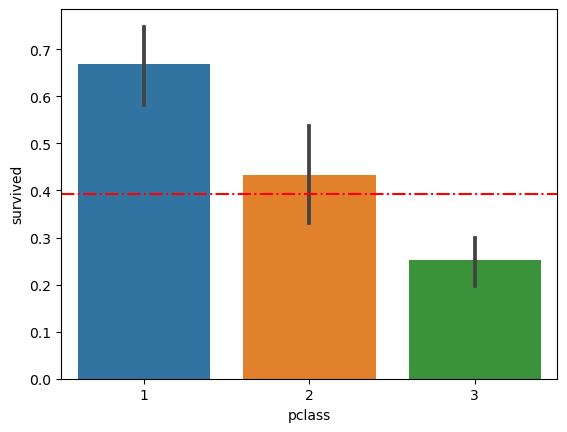

In [72]:
cat_vars=['sex','sibsp','parch','alone']
col = 'pclass'

survival_rate=titanic_train.survived.mean()

sns.barplot(x=col,y='survived',data=titanic_train)
plt.axhline(survival_rate, color='red', linestyle='-.')
plt.show()

In [ ]:
# DROP & BIN = passenger_id, Unamed:0, embarked, class(same as pclass), deck

In [ ]:
# COMBINE = NO

In [ ]:
# TARGET / DRIVER = survivors / SEX, ALONE

In [ ]:
# Traveling alone based on sex?

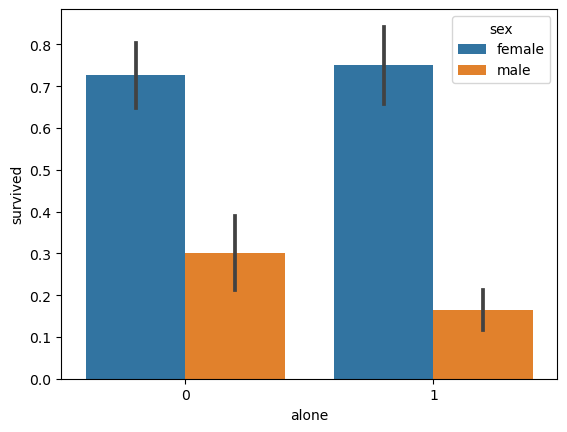

In [76]:
female=titanic_train[titanic_train.sex=='female']
male=titanic_train[titanic_train.sex=='male']

sns.barplot(x='alone',y='survived',data=titanic_train,hue='sex')
plt.show()

In [ ]:
# Class impact suvival rate of gender?

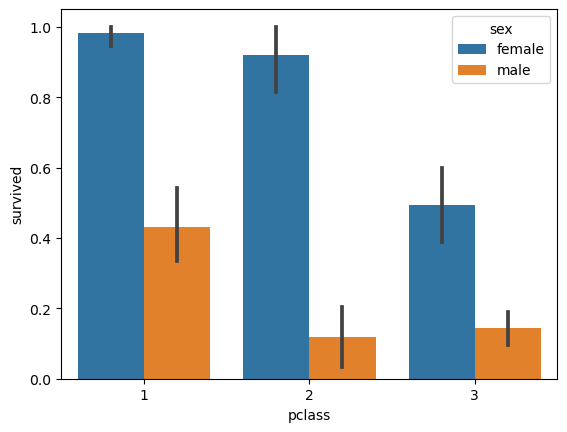

In [77]:
sns.barplot(x='pclass',y='survived',data=titanic_train,hue='sex')
plt.show()

In [ ]:
# Class impact suvival rate of gender & alone?

In [ ]:
# 3rd class impact suvival rate of women & alone?

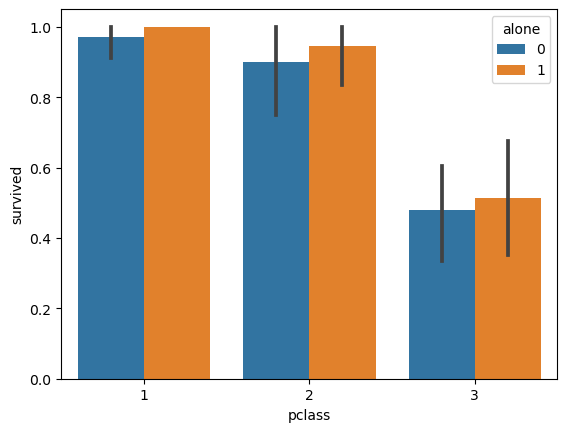

In [80]:
sns.barplot(x='pclass',y='survived',data=titanic_train[titanic_train.sex =='female'],hue='alone')
plt.show()

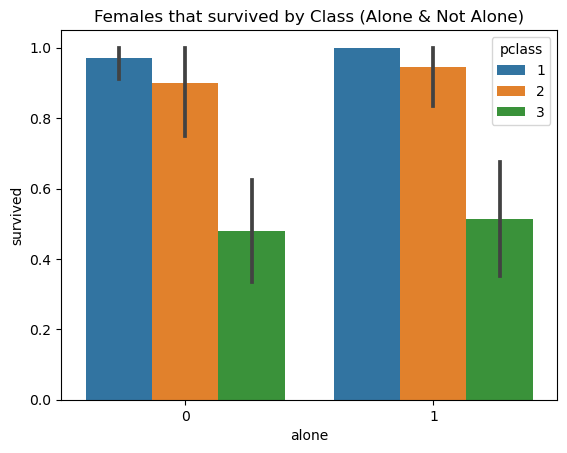

In [82]:
plt.title('Females that survived by Class (Alone & Not Alone)')
sns.barplot(x='alone',y='survived',data=titanic_train[titanic_train.sex =='female'],hue='pclass')
plt.show()

Female in 3rd class who travel alone are sginivifatly more like to surve thatn those not traveling alone.



$H_{0}$: 

In [ ]:
sample = titanic_train[titanic_train.sex=='female'] && titanic_train[titanic_train]
crosstab
chi squre

p<alpha?

### 2. Does it make sense to combine any features?

### 3. Do you find any surprises?

### 4. Document any and all findings and takeaways in your notebook using markdown.

# Explore Exercises
# Part III

### 1. 
- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

In [83]:
telco_df = acquire.get_telco_data()

In [84]:
telco_df = prepare.prep_telco(telco_df)

In [85]:
train_validate, test = train_test_split(telco_df, test_size=.2, random_state=123, stratify=telco_df['churn_Yes'])
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate['churn_Yes'])

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 5310 to 6817
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3943 non-null   object 
 1   gender                                 3943 non-null   object 
 2   senior_citizen                         3943 non-null   int64  
 3   partner                                3943 non-null   object 
 4   dependents                             3943 non-null   object 
 5   tenure                                 3943 non-null   int64  
 6   phone_service                          3943 non-null   object 
 7   multiple_lines                         3943 non-null   object 
 8   online_security                        3943 non-null   object 
 9   online_backup                          3943 non-null   object 
 10  device_protection                      3943 non-null   object 
 11  t

In [ ]:
# TARGET / DRIVER = churn / total_charges

In [ ]:
# CATEGORICAL vs CONTINUOUS

In [ ]:
# DROP = id columns [0-3]

In [ ]:
# COMBINE = 

### 2. What are your drivers of churn?

### 3. Does it make sense to combine any features?

### 4. Do you find any surprises?

### 5. Document any and all findings and takeaways in your notebook using markdown.